In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap lines
pd.set_option('display.width', 0)  # Automatically adjust the width to the terminal

In [39]:
# Import dataset
df = pd.read_csv("student_mat.csv", sep=";")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [40]:
print(df.head())
print(df.info())
print(type(df))


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2          2         0       yes     no   no         no     yes    yes       no       no       4         3      4     1     1       3         6   5   6   6
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1          2         0        no    yes   no         no      no    yes      yes       no       5         3      3     1     1       3         4   5   5   6
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1          2         3       yes     no  yes         no     yes    yes      yes       no       4         3      2     2     3       

In [41]:
print(df.describe().T)
print(df.columns)
print(df.head())

            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.31

In [42]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

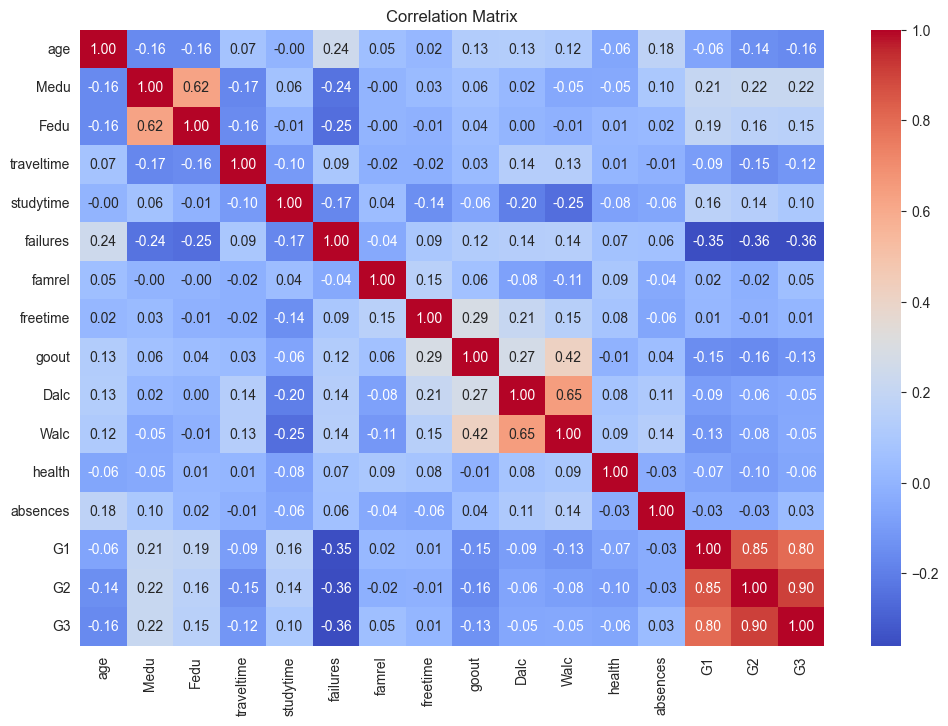

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [43]:
# Check correlation between numerical columns with respect to the each other

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values of all features with respect to 'Price'
print(corr_matrix['G3'].sort_values(ascending=False))

In [44]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [45]:
sns.set_style("whitegrid")

<Axes: xlabel='sex', ylabel='count'>

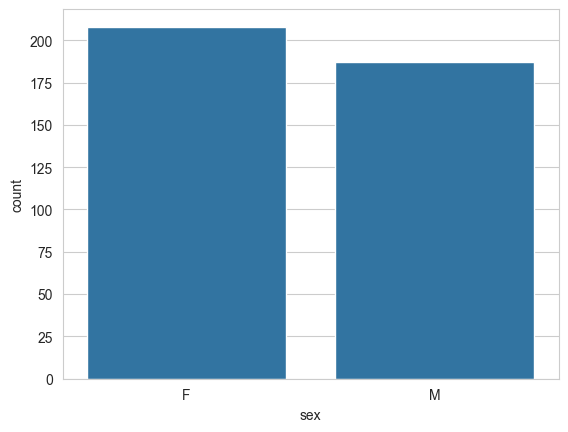

In [46]:
# Compare number of females with males

sns.countplot(data=df, x="sex")
# plt.show()
# print(df.columns)

Exploring those with access to internet, based on gender.

<Axes: xlabel='sex', ylabel='count'>

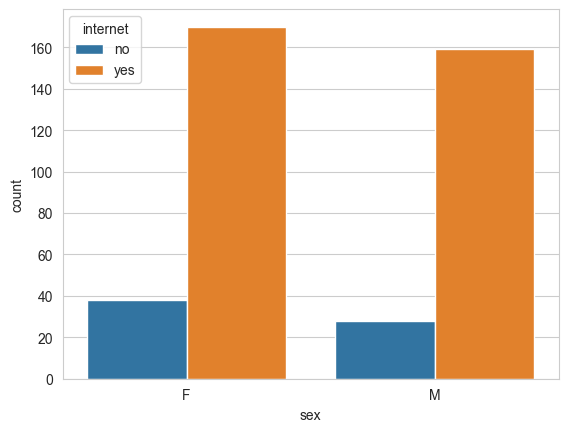

In [47]:
sns.countplot(x="sex", data=df, hue="internet")


Exploring those in romantic relationships, with respect to gender.

<Axes: xlabel='sex', ylabel='count'>

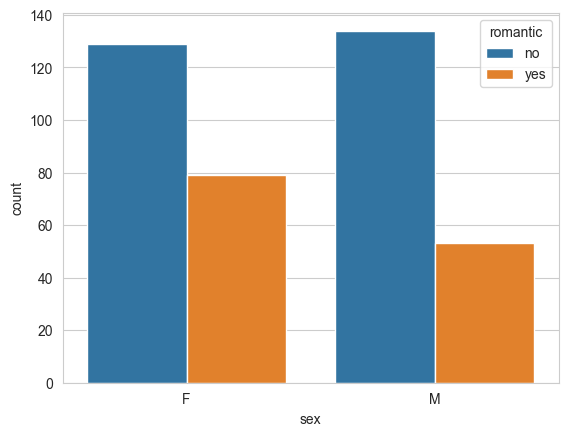

In [48]:
sns.countplot(x="sex", data=df, hue="romantic")

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

# style.use("ggplot")

df = pd.read_csv("student_mat.csv", sep=";")

predict = "G3"

df = df[["G1", "G2", "absences","failures", "studytime","G3"]]
df = shuffle(df) # Optional

x = np.array(df.drop(columns=[predict]))
y =np.array(df[predict])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Train the model 30 times for the best score and pass as the one we're using for prediction, saving as "best"
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        print("the prediction we're making use of is " + str(best))
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# load and save model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    # pass
    print(predicted[x], x_test[x], y_test[x])
    
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
# r2 = r2_score(y_test, predicted)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


the prediction we're making use of is 0.8775103759716438
the prediction we're making use of is 0.8779414939704069
the prediction we're making use of is 0.9034776644788833
5.226986800789589 [7 6 0 0 1] 0
7.339610021917521 [8 8 0 0 1] 11
14.758402581386077 [11 15  2  0  1] 15
7.000561740093122 [ 6  8 16  3  1] 8
12.827424282289607 [13 12 20  0  1] 12
12.781492859921123 [13 13  0  0  2] 12
6.836748021089729 [ 7  7 14  0  1] 5
13.793238085983397 [13 14  4  0  3] 14
10.509329492596772 [13 10 22  1  2] 11
7.109823812496867 [ 9  7 18  0  2] 6
14.60974181996047 [13 15  0  0  3] 15
16.268069867521852 [17 16  0  0  2] 17
9.34413842336199 [ 8 10  4  0  2] 9
15.632998285640214 [16 15 11  0  2] 15
11.4265011241284 [10 12  4  0  3] 12
10.884066229859288 [13 11  2  0  2] 11
10.700198552356458 [11 11  6  1  1] 10
11.652996184875944 [10 12  2  0  1] 12
14.863855560687535 [15 15  0  0  3] 15
14.894116081049054 [14 15  0  0  2] 16
14.913078131729128 [14 15  4  0  3] 16
12.62417546919607 [13 13  0  0  3] 